<a href="https://colab.research.google.com/github/Lisepetrova/Final_PythonUrban/blob/main/%D0%9D%D0%9C%D0%9C_%D0%98%D0%94%D0%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Задача 1

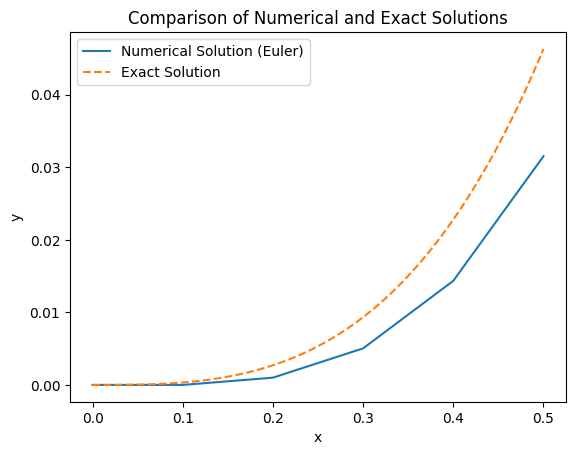

In [2]:
def f(x, y):
    return (y + x)**2

def euler_method(h, x_end):
    x_values = [0.0]
    y_values = [0.0]

    x = 0.0
    y = 0.0

    while x < x_end:
        y = y + h * f(x, y)
        x = x + h

        x_values.append(x)
        y_values.append(y)

    return x_values, y_values

def exact_solution(x):
    return np.tan(x) - x

def compute_errors(x_values, y_values, exact_solution):
    delta_y_values = [h * f(x_values[i], y_values[i]) for i in range(len(x_values))]
    epsilon_values = [abs(exact_solution(x_values[i]) - y_values[i]) for i in range(len(x_values))]
    return delta_y_values, epsilon_values
x_end = 0.5
h = 0.1

x_numerical, y_numerical = euler_method(h, x_end)

x_exact = np.linspace(0, 0.5, 100)
y_exact = exact_solution(x_exact)

plt.plot(x_numerical, y_numerical, label='Numerical Solution (Euler)')
plt.plot(x_exact, y_exact, label='Exact Solution', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of Numerical and Exact Solutions')
plt.show()

delta_y, epsilon = compute_errors(x_numerical, y_numerical, exact_solution)


In [3]:
data = {
    'x': x_numerical,
    'y': y_numerical,
    'y_ист': [exact_solution(x) for x in x_numerical],
    'Δyk': delta_y,
    'εk': epsilon
}

df = pd.DataFrame(data)
print(df)


     x         y     y_ист       Δyk        εk
0  0.0  0.000000  0.000000  0.000000  0.000000
1  0.1  0.000000  0.000335  0.001000  0.000335
2  0.2  0.001000  0.002710  0.004040  0.001710
3  0.3  0.005040  0.009336  0.009305  0.004296
4  0.4  0.014345  0.022793  0.017168  0.008448
5  0.5  0.031513  0.046302  0.028251  0.014789


## Задача 2

Шаг 0: x = 0.00, y = 0.000000, Δy_k = 0.000000, ε_k = 0.000000
Шаг 1: x = 0.10, y = 0.000500, Δy_k = 0.001010, ε_k = 0.000165
Шаг 2: x = 0.20, y = 0.003035, Δy_k = 0.004122, ε_k = 0.000325
Шаг 3: x = 0.30, y = 0.009814, Δy_k = 0.009598, ε_k = 0.000478
Шаг 4: x = 0.40, y = 0.023408, Δy_k = 0.017927, ε_k = 0.000615


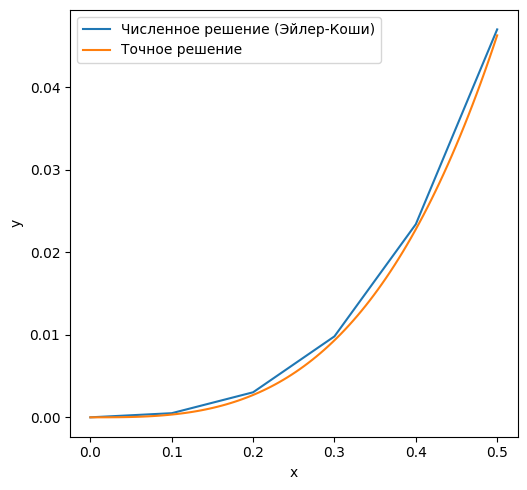

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (y + x)**2

def analytical_solution(x):
    return np.tan(x) - x

def euler_cromer_method(f, x0, y0, h, end_x):
    x_values = [x0]
    y_values = [y0]
    delta_y_values = []
    epsilon_values = []

    while x_values[-1] < end_x:
        x_i = x_values[-1]
        y_i = y_values[-1]

        y_sh_i = y_i + h * f(x_i, y_i)
        y_i1 = y_i + h * ((f(x_i, y_i) + f(x_i + h, y_sh_i)) / 2)
        x_i1 = x_i + h

        x_values.append(x_i1)
        y_values.append(y_i1)

        delta_y_k = h * f(x_i, y_i)
        epsilon_k = np.abs(analytical_solution(x_i) - y_i)

        delta_y_values.append(delta_y_k)
        epsilon_values.append(epsilon_k)

    return x_values, y_values, delta_y_values, epsilon_values


x0 = 0
y0 = 0

h = 0.1
end_x = 0.5


x_values, y_values, delta_y_values, epsilon_values = euler_cromer_method(f, x0, y0, h, end_x)


for i, (x, y, delta_y, epsilon) in enumerate(zip(x_values, y_values, delta_y_values, epsilon_values)):
    print(f"Шаг {i}: x = {x:.2f}, y = {y:.6f}, Δy_k = {delta_y:.6f}, ε_k = {epsilon:.6f}")


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x_values, y_values, label='Численное решение (Эйлер-Коши)')
plt.plot(x_exact, y_exact, label='Точное решение')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


## Задача 3

x = 0.00, Exact y = 0.000000, y = 0.000000, 
x = 0.10, Exact y = 0.000335, y = 0.000500, 
x = 0.20, Exact y = 0.002710, y = 0.003015, 
x = 0.30, Exact y = 0.009336, y = 0.009667, 
x = 0.40, Exact y = 0.022793, y = 0.022853, 
x = 0.50, Exact y = 0.046302, y = 0.045462, 


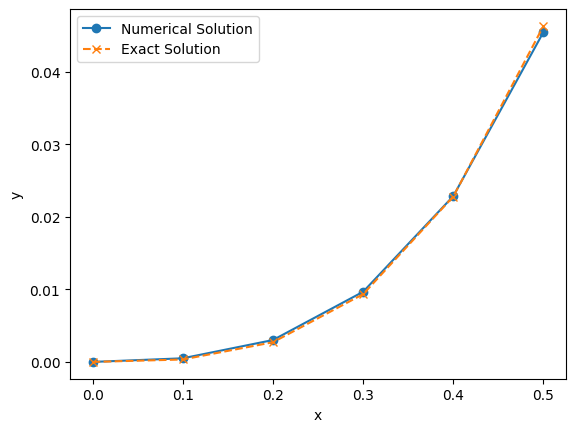

In [5]:
def exact_solution(x):
    return np.tan(x) - x

def euler_cromer_method(x0, y0, h, end):
    x_values = [x0]
    y_values = [y0]

    while x_values[-1] < end:
        x_i = x_values[-1]
        y_i = y_values[-1]

        for _ in range(5):
            y_next = y_i + h * ((y_i + x_i)**2 + (y_i + x_i + h)**2) / 2

        x_values.append(x_i + h)
        y_values.append(y_next)

    return x_values, y_values

x0 = 0
y0 = 0
h = 0.1
end = 0.5

x_values, y_values_numerical = euler_cromer_method(x0, y0, h, end)
y_values_exact = exact_solution(np.array(x_values))

for x, y_num, y_exact in zip(x_values, y_values_numerical, y_values_exact):
    print(f"x = {x:.2f}, Exact y = {y_exact:.6f}, y = {y_num:.6f}, ")

plt.plot(x_values, y_values_numerical, label='Numerical Solution', marker='o')
plt.plot(x_values, y_values_exact, label='Exact Solution', linestyle='--', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## Задача 4

x = 0.0,  y = 0.0000, y_ист = 0.0000, Delta y = 0.0000, Epsilon = 0.0000
x = 0.1,  y = 0.0000, y_ист = 0.0003, Delta y = 0.0010, Epsilon = 0.0003
x = 0.2,  y = 0.0024, y_ист = 0.0027, Delta y = 0.0041, Epsilon = 0.0003
x = 0.3,  y = 0.0090, y_ист = 0.0093, Delta y = 0.0095, Epsilon = 0.0004
x = 0.4,  y = 0.0224, y_ист = 0.0228, Delta y = 0.0178, Epsilon = 0.0004
x = 0.5,  y = 0.0458, y_ист = 0.0463, Delta y = 0.0298, Epsilon = 0.0005
x = 0.6,  y = 0.0833, y_ист = 0.0841, Delta y = 0.0467, Epsilon = 0.0008
x = 0.7,  y = 0.1411, y_ист = 0.1423, Delta y = 0.0707, Epsilon = 0.0012
x = 0.8,  y = 0.2276, y_ист = 0.2296, Delta y = 0.1056, Epsilon = 0.0020
x = 0.9,  y = 0.3565, y_ист = 0.3602, Delta y = 0.1579, Epsilon = 0.0037


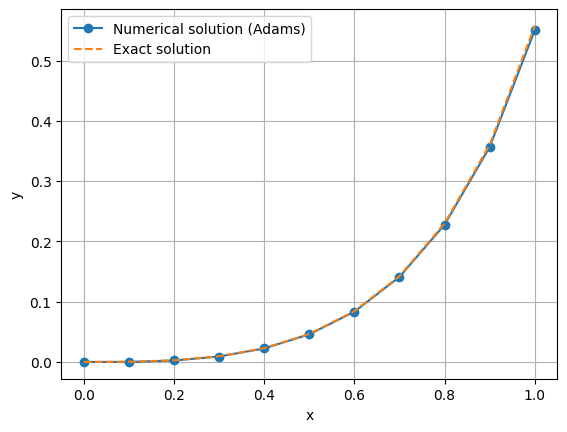

In [6]:
def f(x, y):
    return (y + x)**2

def exact_solution(x):
    return np.tan(x) - x

def adams_method(h, n_steps):
    x_values = np.arange(0, 1.1, h)
    y_values = np.zeros_like(x_values)

    y_values[0] = 0
    y_values[1] = 0

    delta_y_values = []
    epsilon_values = []

    for n in range(1, min(4, n_steps)):
        k1 = h * f(x_values[n], y_values[n])
        k2 = h * f(x_values[n] + h/2, y_values[n] + k1/2)
        k3 = h * f(x_values[n] + h/2, y_values[n] + k2/2)
        k4 = h * f(x_values[n] + h, y_values[n] + k3)
        y_values[n+1] = y_values[n] + (k1 + 2*k2 + 2*k3 + k4)/6

    for n in range(4, n_steps):
        y_values[n+1] = y_values[n] + h/24 * (
            55 * f(x_values[n], y_values[n]) -
            59 * f(x_values[n-1], y_values[n-1]) +
            37 * f(x_values[n-2], y_values[n-2]) -
            9 * f(x_values[n-3], y_values[n-3])
        )
    for n in range(n_steps):
        delta_y = h * f(x_values[n], y_values[n])
        epsilon = np.abs(exact_solution(x_values[n]) - y_values[n])
        delta_y_values.append(delta_y)
        epsilon_values.append(epsilon)

    return x_values, y_values, delta_y_values, epsilon_values

h = 0.1
n_steps = 10

x_values, y_values, delta_y_values, epsilon_values = adams_method(h, n_steps)
exact_y_values = exact_solution(x_values)

for x, y_numerical, y_exact, delta_y, epsilon in zip(x_values, y_values, exact_y_values, delta_y_values, epsilon_values):
    print(f"x = {x:.1f},  y = {y_numerical:.4f}, y_ист = {y_exact:.4f}, Delta y = {delta_y:.4f}, Epsilon = {epsilon:.4f}")

plt.plot(x_values, y_values, marker='o', label='Numerical solution (Adams)')
plt.plot(x_values, exact_y_values, label='Exact solution', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## Задача 5

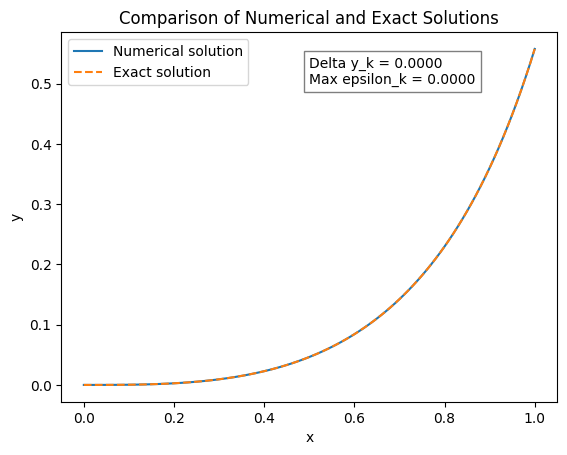

In [7]:
def model(y, x):
    dydx = (y + x)**2
    return dydx

def exact_solution(x):
    return np.tan(x) - x

y0 = 0

x = np.linspace(0, 1, 101)

y_numerical = odeint(model, y0, x)

y_exact = exact_solution(x)

h = x[1] - x[0]

Delta_y = h * model(y0, x[0])
epsilon = np.abs(y_exact - y_numerical.squeeze())

plt.plot(x, y_numerical, label='Numerical solution')
plt.plot(x, y_exact, label='Exact solution', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Numerical and Exact Solutions')

plt.text(0.5, 0.5, f'Delta y_k = {Delta_y:.4f}\nMax epsilon_k = {np.max(epsilon):.4f}', bbox=dict(facecolor='white', alpha=0.5))

plt.legend()
plt.show()
